# Data visualisation task – model answer

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Inline indicates graphs should be presented as a cell output
%matplotlib inline

In [ ]:
# Load data
car_data = pd.read_csv('Cars93.csv', index_col = 0, keep_default_na=False)
car_data.head()
# Note the additional keep_default_na parameter which is set to False. This ensures
# that pandas does not interpret the None string in the AirBags column as NaN.

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27,13,3640,non-USA,BMW 535i


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.capac

### 1. Boxplot

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


In [ ]:
# Boxplots of revs per mile for Audi, Hyundai, Suzuki and Toyota car manufacturers
# Filter the DataFrame for the selected manufacturers
selected_manufacturers = car_data[car_data['Manufacturer'].isin(['Audi', 'Hyundai', 'Suzuki', 'Toyota'])]

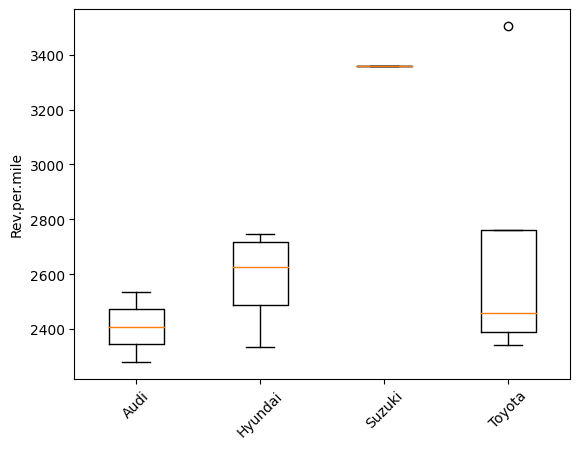

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the box plot
box_plot_data = [selected_manufacturers['Rev.per.mile'][selected_manufacturers['Manufacturer'] == manufacturer] for manufacturer in ['Audi', 'Hyundai', 'Suzuki', 'Toyota']]
ax.boxplot(box_plot_data)

# Set the x-tick labels to the manufacturer names and rotate for readability
ax.set_xticklabels(['Audi', 'Hyundai', 'Suzuki', 'Toyota'], rotation=45)

# Set the y-label
ax.set_ylabel('Rev.per.mile')

# Display the plot
plt.show()

**Boxplot answer:** From the box plot we can see as indicated by the top whisker of the Suzuki box plot at almost 3400,  it has the highest number of revs per mile across the four manufacturers


### 2. Histogram

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

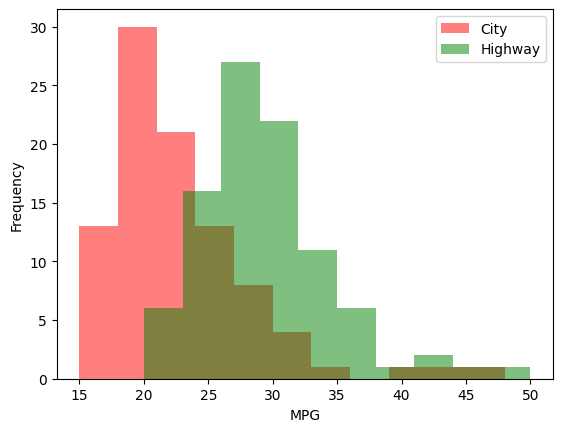

In [ ]:
# Histogram of MPG in the city vs MPG highway
# Create a figure and axis
fig, ax = plt.subplots()

# Create the histograms
ax.hist(car_data['MPG.city'], bins=range(min(car_data['MPG.city']), max(car_data['MPG.city']) + 3, 3), alpha=0.5, label='City', color='red')
ax.hist(car_data['MPG.highway'], bins=range(min(car_data['MPG.highway']), max(car_data['MPG.highway']) + 3, 3), alpha=0.5, label='Highway', color='green')

# Set the x-label and y-label
ax.set_xlabel('MPG')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend(loc='upper right')

# Display the plot
plt.show()

**Histogram answer:** From the histogram, we can see that cars are generally more fuel efficient on the highway than in the city. This is indicated by the ‘Highway’ histogram being shifted to the right compared to the ‘City’ histogram, meaning higher MPG values are more common on the highway. This makes sense, as driving conditions on the highway are usually more conducive to fuel efficiency (steady speed, less stopping and starting, etc.)

### 3. Lineplot

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


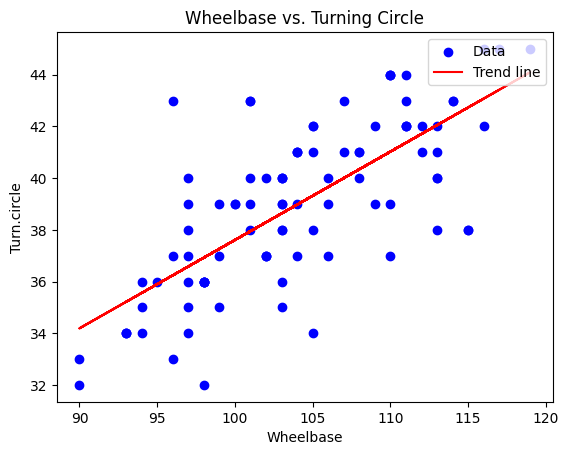

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the scatter plot for the data points
ax.scatter(car_data['Wheelbase'], car_data['Turn.circle'], label='Data', color='blue')

# Perform a linear regression on the data
slope, intercept, r_value, p_value, std_err = linregress(car_data['Wheelbase'], car_data['Turn.circle'])

# Create the trend line
trend_line = intercept + (slope * car_data['Wheelbase'])

# Plot the trend line
ax.plot(car_data['Wheelbase'], trend_line, 'r', label='Trend line')

# Set the x-label, y-label, and title
ax.set_xlabel('Wheelbase')
ax.set_ylabel('Turn.circle')
ax.set_title('Wheelbase vs. Turning Circle')

# Add a legend
ax.legend(loc='upper right')

# Display the plot
plt.show()

**Lineplot answer:** From the line plot, we can see that there is a positive relationship between the wheelbase and turning circle of a car. As the wheelbase (the distance between the front and rear wheels) gets larger, the turning circle (the smallest circle that a car can turn around) also gets larger. This makes sense, as a car with a larger wheelbase would need a larger space to turn around. The trend line added to the plot further emphasizes this positive relationship. It’s important to note that while there is a clear trend, there are some exceptions, as indicated by the points that do not fall exactly on the trend line.  


### 4. Barplot

**Barplot question:**  
Does a larger car mean more horsepower?



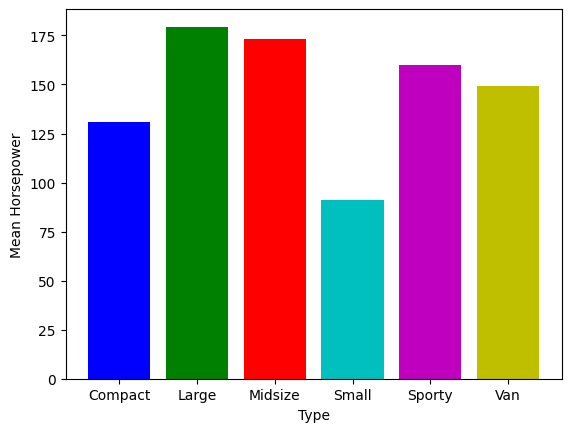

In [ ]:
# Barplot for mean horsepower
# Calculate the mean horsepower for each car type
mean_horsepower = car_data.groupby('Type')['Horsepower'].mean()

# Create a figure and axis
fig, ax = plt.subplots()

# Create a color list
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create the bar plot with colors
bars = ax.bar(mean_horsepower.index, mean_horsepower.values, color=colors)

# Set the x-label and y-label
ax.set_xlabel('Type')
ax.set_ylabel('Mean Horsepower')

# Display the plot
plt.show()

**Barplot answer:** From the bar plot, we can see the mean horsepower for each car type. It appears that larger cars, such as midsize and large, tend to have higher horsepower on average compared to smaller cars like compact and small. This makes sense as larger cars often require more power to move efficiently. However, it’s important to note that this is an average, and there can be exceptions. For example, a small sports car might have a high horsepower to enhance its performance. Therefore, while there is a general trend that larger cars have more horsepower, it’s not a hard and fast rule.